In [11]:
import tensorflow as tf
import matplotlib.pylab as plt
import cv2
import numpy as np

tflite_model_file = 'openpose_singlenet.tflite'

interpreter = tf.lite.Interpreter(model_path=tflite_model_file)

inp_index = interpreter.get_input_details()[0]["index"]

out_details = sorted(interpreter.get_output_details(), key=lambda k: k['index']) 

heatmap_idx = out_details[-1]["index"]
paf_idx = out_details[-2]["index"]

print(interpreter.get_input_details())

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([  1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


# Load sample image and run the model

In [12]:
test_image = 'resources/ski_224.jpg'

img = cv2.imread(test_image) # B,G,R order
img = np.expand_dims(img, 0)

input_tensor= tf.convert_to_tensor(img, np.uint8)

interpreter.allocate_tensors()

interpreter.set_tensor(inp_index, input_tensor)

interpreter.invoke()

heatmaps = interpreter.get_tensor(heatmap_idx)
pafs = interpreter.get_tensor(paf_idx)

# Show predictions: paf and heatmap

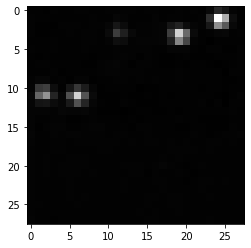

In [13]:
heatmap_idx = 0 # nose

plt.imshow(heatmaps[0, :, :, heatmap_idx], cmap='gray')

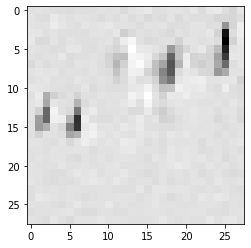

In [14]:
paf_dx_idx = 0
paf_dy_idx = 1

plt.imshow(pafs[0, :, :, paf_dx_idx], cmap='gray')

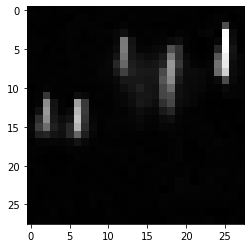

In [15]:
plt.imshow(pafs[0, :, :, paf_dy_idx], cmap='gray')